#Grupo 25 - Entregable AyVD
#Parte 1 de 2

Integrantes:

Rufeil Fiori, Elena

Sosa, Manuel

Taié Mirón, Macarena

Yurovich, Luis Federico


**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2022**

---
## Trabajo práctico entregable - Parte 1

In [ ]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn

seaborn.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [ ]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [ ]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

In [ ]:
#df.columns

In [ ]:
# Consideramos solo estas dos columnas como relevantes para este problema
relevant_columns = ['tools_programming_languages', 'salary_monthly_NETO']

In [ ]:
#df.tools_programming_languages.unique()

# Resolución del ejercicio 1:

Responder a la pregunta: ¿Cuáles son los lenguajes de programación asociados a los mejores salarios?

Realizamos los siguientes pasos para responder esta pregunta:

Primero, eliminaremos del dataset filas que contengan valores no deseados de la columna sueldo (salary_monthly_NETO). Aquí usamos como criterio quedarnos con la subpoblación de sueldos que sean mayores a \$25k y menores a \$500k, por considerar esta subpoblación más realista.

Segundo, seleccionaremos una subpoblación de lenguajes de programación, utilizando como criterio los lenguajes que cuenten con más de 1000 usuari@s en la presente encuesta.

Tercero, a cada lenguaje de programación elegido le calcularemos su distribución de sueldos y su mediana y media. 

Cuarto, analizaremos la probabilidad de ganar más de cierto monto dado que se trabaja con algunos lenguajes en particular.


# 1°) Eliminación de valores extremos de salary_monthly_NETO y construcción de subpoblación de la misma.

Utilizando el criterio de considerar outliers aquellos datos mayores a maxq = Q3+1.5*IQR, eliminamos filas de la columna 'salary_monthly_NETO'. Pero esto nos condujo a eliminar demasiados datos. Por lo que tomamos como criterio analizar una subpoblación de sueldos menores que 500k para el presente análisis. Además, tomaremos en esta subpoblacion de sueldos los que sean mayores a 25k, por considerar estas cifras más acordes a la pregunta que buscamos responder.

In [ ]:
salary_col='salary_monthly_NETO'

In [ ]:
df[salary_col].describe().apply(lambda s: '{0:.2f}'.format(s))

count       5883.00
mean       94907.95
std        96862.26
min            1.00
25%        51480.00
50%        78000.00
75%       106000.00
max      2080000.00
Name: salary_monthly_NETO, dtype: object

In [ ]:
#Calculamos maxq, que luego lo usaremos para definir outliers
q3 = df['salary_monthly_NETO'].quantile(75/100) #(97 / 100) #q3=106000.00
q1 = df['salary_monthly_NETO'].quantile(25/100) #(97 / 100) #q1=51480.00
iqr = q3 - q1
maxq= q3+1.5*iqr
print(maxq)
#otro criterio
q95 = df['salary_monthly_NETO'].quantile(95 / 100)
print(q95)
q97 = df['salary_monthly_NETO'].quantile(97 / 100)
print(q97)

187780.0
210000.0
300000.0


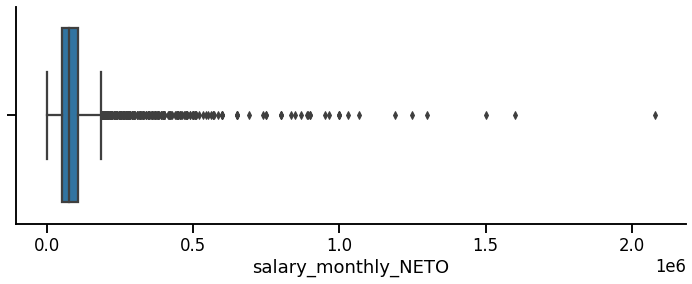

In [ ]:
#visualizamos maxq y los puntos a tirar:
plt.figure(figsize=(12, 4))
seaborn.boxplot(x=df[salary_col])
seaborn.despine()

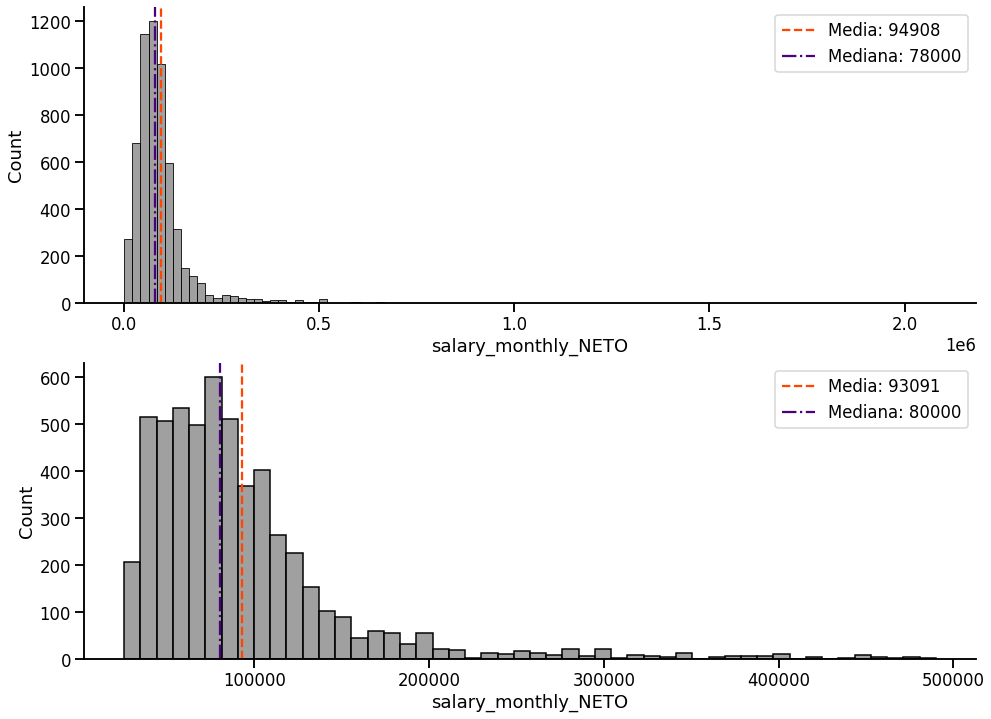

In [ ]:
# construccion del dataset filtrado por salario: filtered_df
# y lo comparamos con el original
fig, axes = plt.subplots(nrows=2, figsize=(16, 12))

seaborn.histplot(df[salary_col], bins=100, ax=axes[0], color='gray')
#seaborn.histplot(df[salary_col], bins=np.logspace(3,7,40), ax=axes[0], color='gray')
#axes[0].set_xscale("log")
#axes[0].set_yscale("log")
axes[0].axvline(df[salary_col].mean(), color='orangered',
            linestyle='--', label='Media: '+str('{:5.0f}'.format(df[salary_col].mean())))
axes[0].axvline(df[salary_col].median(), color='indigo',
            linestyle='-.', label='Mediana: '+str('{:5.0f}'.format(df[salary_col].median())))

limite_inferior=25000
limite_superior=500000 #q97 #maxq
filtered_df = df[(limite_inferior< df[salary_col]) & (df[salary_col] < limite_superior)]
seaborn.histplot(filtered_df[salary_col], bins=50, ax=axes[1], color='gray')
axes[1].axvline(filtered_df[salary_col].mean(), color='orangered',
            linestyle='--', label='Media: '+str('{:5.0f}'.format(filtered_df[salary_col].mean())))
axes[1].axvline(filtered_df[salary_col].median(), color='indigo',
            linestyle='-.', label='Mediana: '+str('{:5.0f}'.format(filtered_df[salary_col].median())))

axes[0].legend()
axes[1].legend()
seaborn.despine()

In [ ]:
#Comparamos las metricas del dataset original,
df[salary_col].describe().apply(lambda s: '{0:.2f}'.format(s))

count       5883.00
mean       94907.95
std        96862.26
min            1.00
25%        51480.00
50%        78000.00
75%       106000.00
max      2080000.00
Name: salary_monthly_NETO, dtype: object

In [ ]:
#con las del nuevo dataset:
filtered_df[salary_col].describe().apply(lambda s: '{0:.2f}'.format(s))

count      5484.00
mean      93091.00
std       61282.90
min       25400.00
25%       55414.75
50%       80000.00
75%      107931.00
max      490000.00
Name: salary_monthly_NETO, dtype: object

Aquí usamos primero el criterio de considerar como outliers aquellos valores de sueldo que sean mayores al valor maxq, donde maxq = Q3+1.5*IQR. Cuando usamos como limite superior maxq para filtrar datos, observamos que la mediana se modificó apenas en un 1%, mientras que la media en un 14%, y la distancia entre media y mediana se redujo notablemente. Sin embargo, observamos que en total tirabamos 5883 - 5150 = 733 filas, lo que correspondía a un 12% del total, y este no es un porcentaje para nada despreciable.

Por lo que consideramos más adecuado quedarnos con la subpoblación de sueldos entre 25k y 500k para hacer el análisis, aunque este análisis sea justamente condicional a una subpoblación.

In [ ]:
#filtered_df[:3]
#filtered_df[salary_col][:3]

# 2°) Seleccionamos los lenguajes de programacion más usados por les encuestades.

Para ello haremos un conteo de frecuencias de los lenguajes de programación, y utilizaremos como criterio quedarnos con aquellos lenguajes con más de 1000 usuaries. 




La columna que contiene información sobre los lenguajes de programación utilizados es `tools_programming_languages`. Sus valores son strings con los lenguajes seleccionados separados por comas.

In [ ]:
filtered_df.tools_programming_languages[:3]

0                     Ninguno
1    HTML, Javascript, Python
2                     Ninguno
Name: tools_programming_languages, dtype: object

Las siguientes celdas de código separan estos lenguajes de programación y cuentan la frecuencia con la que aparecen.

No es necesario entender este código en profundidad, aunque sí es un buen ejercicio.

In [ ]:
#Aquí se reemplazó df por filtered_df

# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
filtered_df.loc[:, 'cured_programming_languages'] = filtered_df\
    .tools_programming_languages.apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = filtered_df.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(filtered_df[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.
df_lang[:5]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,programming_language,tools_programming_languages,salary_monthly_NETO,cured_programming_languages
0,ninguno,Ninguno,43000.0,[ninguno]
1,html,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
2,ninguno,Ninguno,127000.0,[ninguno]


En la columna `programming_language` se encuentra cada lenguaje por separado. Notar que si una respuesta contenía 3 lenguajes, como `"HTML, Javascript, Python"`, la fila ha sido replicada 3 veces. Por ello, hay tres filas con índice 1.

In [ ]:
#Rankeamos los diferentes lenguajes por frecuencia y limitamos por un mínimo de usuaries
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
#language_count[:12]
min_usuaries = 200
language_count[language_count['frequency'] > min_usuaries][:50]

,language,frequency
0,javascript,2249
1,sql,1957
2,html,1658
3,python,1340
4,java,1331
5,css,1103
6,bash/shell,921
7,php,788
8,.net,744
9,typescript,697


### Filtrado de lenguajes relevantes

El siguiente código permite seleccionar sólo las filas donde el valor de la columna `programming_language` se encuentre en la lista `interesting_languages`.

In [ ]:
# Filtramos los lenguajes con menos del minimo de usuaries definido anteriormente:
interesting_languages = language_count['language'][language_count['frequency'] > min_usuaries ]
filtered_df_lang = df_lang[df_lang.programming_language.isin(interesting_languages)]

# Filtramos los lenguajes con menos de 1000 usuaries:
#interesting_languages = ["javascript","html","sql","python", "java", "css"] 
#filtered_df_lang = df_lang[df_lang.programming_language.isin(interesting_languages)]

# Tambien podemos excluir manualmente categorias que sepamos no son exclusivamente lenguajes sino herramientas que todos usan
# herramientas = ['sql', 'bash/shell', 'html']
# interesting_languages = language_count['language'][(~language_count.language.isin(herramientas)) & (language_count['frequency'] > min_usuaries)]

filtered_df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,cured_programming_languages
0,ninguno,Ninguno,43000.0,[ninguno]
1,html,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,"[html, javascript, python]"
2,ninguno,Ninguno,127000.0,[ninguno]


In [ ]:
#df_lang[df_lang.programming_language.isin(["python"])].describe()

¿Los lenguajes que mayor salario tienen son representativos según la cantidad de encuestas respondidas? 

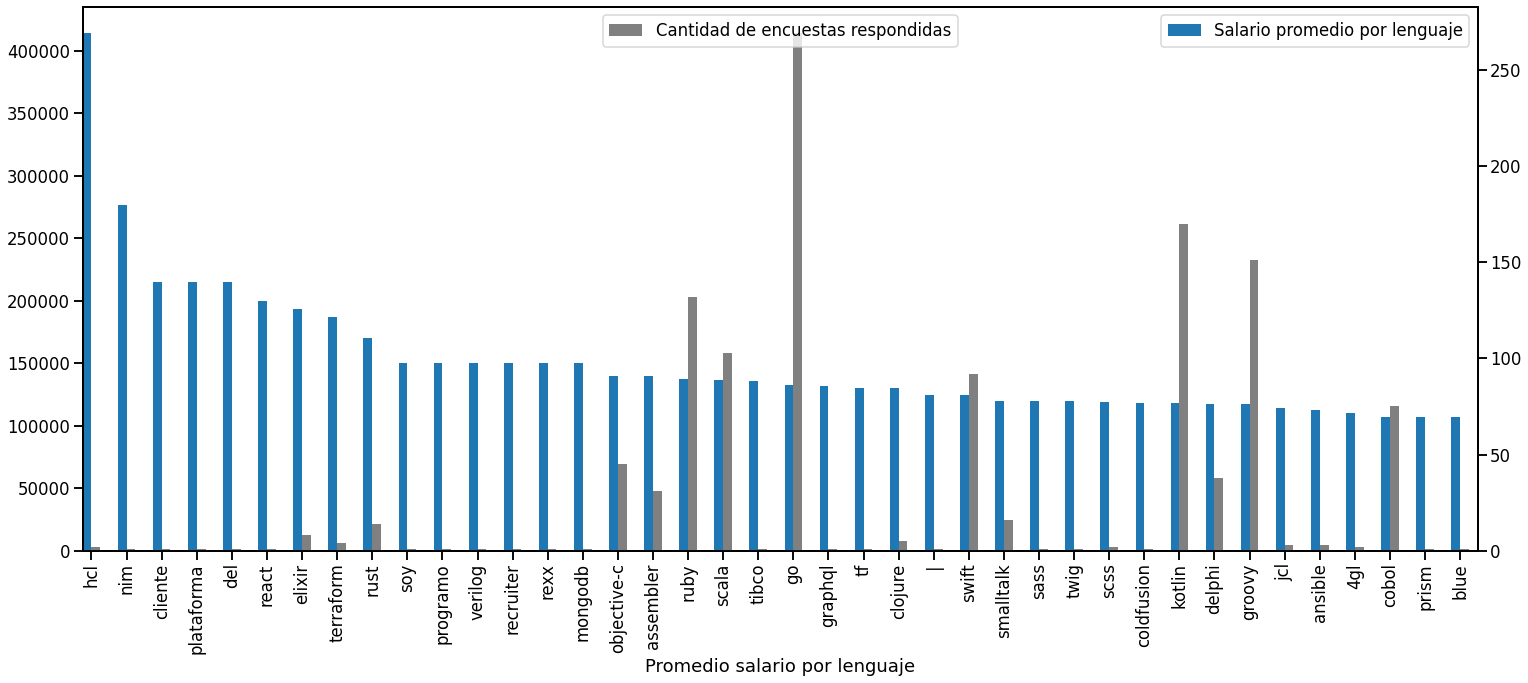

In [ ]:
d = df_lang
width = 0.5
n = 40
language_salary = d.groupby("programming_language")["salary_monthly_NETO"].mean().sort_values(ascending = False)
language_count = d.groupby("programming_language")["programming_language"].count()
fig, ax = plt.subplots(figsize = [25,10])
language_salary[:n].plot(kind = "bar", ax = ax, width = -width/2, align = "edge", label = "Salario promedio por lenguaje") # language_count.index
ax2 = plt.twinx()
language_count[language_salary[:n].index].plot(kind = "bar", color = "gray", ax = ax2, width = width/2, align = "edge", label = "Cantidad de encuestas respondidas")
ax.set_xlabel("Promedio salario por lenguaje")
ax.legend(loc = 'upper right')
ax2.legend(loc = 'upper center')
plt.show()

Se puede ver que en general los lenguajes con mayor sueldo promedio tienen pocas respuestas y esto no lo consideramos representativo. Entonces el primer criterio a tener en cuenta para elegir una subpoblación es la cantidad de usuaries. 

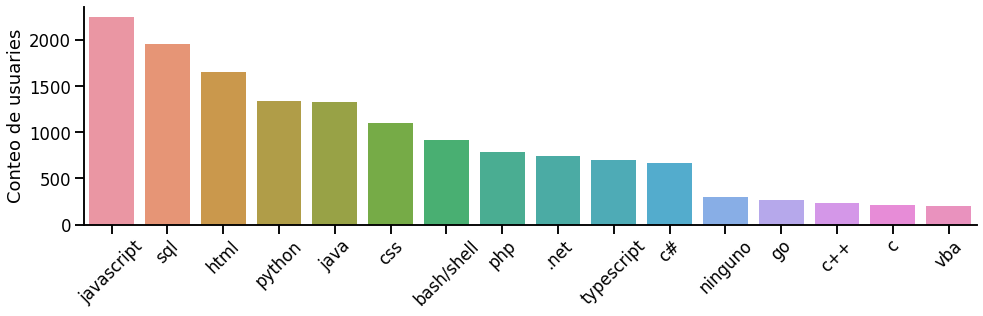

In [ ]:
count_by_progr_lang = filtered_df_lang.programming_language.value_counts()
fig = plt.figure(figsize=(16, 4))
seaborn.barplot(x=count_by_progr_lang.index, y=count_by_progr_lang.values)
plt.xticks(rotation=45)
plt.ylabel("Conteo de usuaries")
seaborn.despine()

# 3°) Métricas y gráficas para comparar los lenguajes elegidos.

Para cada lenguaje de programación calculamos media, mediana,  boxplots, y distribuciones, para luego compararlos entre sí.

In [ ]:
p=(filtered_df_lang.groupby('programming_language').mean().salary_monthly_NETO).sort_values(ascending=False)
p

programming_language
go            132670.036171
python        106008.436963
c             105757.618241
typescript    105653.887446
bash/shell    102763.138393
java          100071.040856
c++            99818.328193
javascript     97540.742245
.net           94176.208535
c#             93948.333189
php            93133.049949
sql            91788.534614
html           91685.634150
css            90256.665113
ninguno        87238.562914
vba            82735.982206
Name: salary_monthly_NETO, dtype: float64

In [ ]:
#medianas:
p=(filtered_df_lang.groupby('programming_language').median().salary_monthly_NETO).sort_values(ascending=False)
p

programming_language
go            110000.0
bash/shell     90000.0
python         90000.0
java           89784.0
typescript     87000.0
c              85000.0
javascript     80564.0
.net           80000.0
c++            80000.0
sql            80000.0
c#             78000.0
php            78000.0
html           75600.0
css            75000.0
ninguno        75000.0
vba            74880.0
Name: salary_monthly_NETO, dtype: float64

Vemos que las medias y las medianas mantienen el mismo orden de mayor a menor, siendo las mayores las correspondientes a python y java.

(0.0, 250000.0)

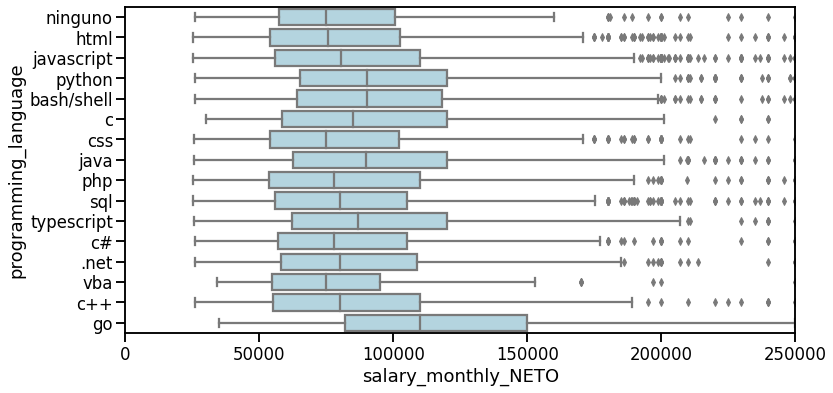

In [ ]:
#boxplots
plt.figure(figsize=(12, 6))
seaborn.boxplot(data=filtered_df_lang, x='salary_monthly_NETO', y='programming_language',
                color='lightblue')
plt.ticklabel_format(style='plain', axis='x')
plt.xlim([0,250000])

A nuestro criterio, las medianas no difieren mucho entre sí, salvo el caso del lenguaje 'go'. Se debería usar algún criterio estadístico para determinar si son o no diferentes entre sí.

In [ ]:
#veamos las distribuciones de cada lenguaje, para ver cómo se comporta la muestra completa
#distribuciones de los lenguajes analizados:
#plt.figure(figsize=(12, 6))
#seaborn.histplot(data=filtered_df_lang.reset_index(), x='salary_monthly_NETO', hue='programming_language', kde=True)
#plt.ticklabel_format(style='plain', axis='x')
#(si no reseteabamos los indices, no andaba el hist, porq se le hace lio con los indices repetidos)
#filtered_df_lang

Como resulta muy dificil visualizar la comparación de los todos los lenguajes analizados, comparamos de a dos.

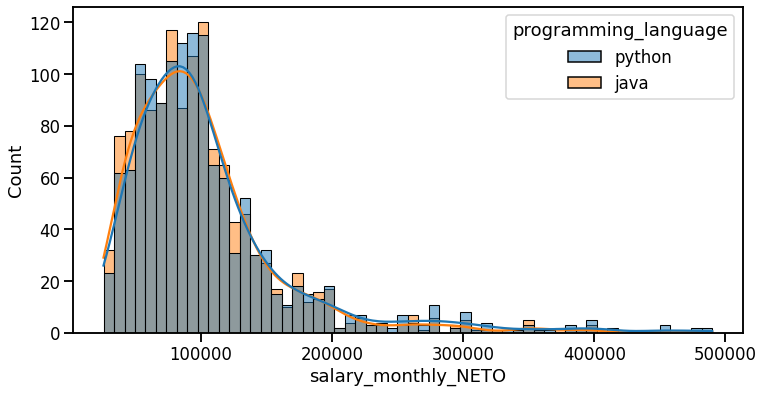

In [ ]:
#Comparamos los lenguajes con medias más altas: 'Java' y 'Python'.
interesting_languages = ["java","python"] #"javascript","html","sql","python", "java", "css"] 
filtered_df_lang_2 = df_lang[df_lang.programming_language.isin(interesting_languages)]
#distribuciones:
plt.figure(figsize=(12, 6))
seaborn.histplot(data=filtered_df_lang_2.reset_index(), x='salary_monthly_NETO', hue='programming_language', kde=True)
plt.ticklabel_format(style='plain', axis='x')

Vemos que estadísticamente son muy parecidas estas dos muestras.

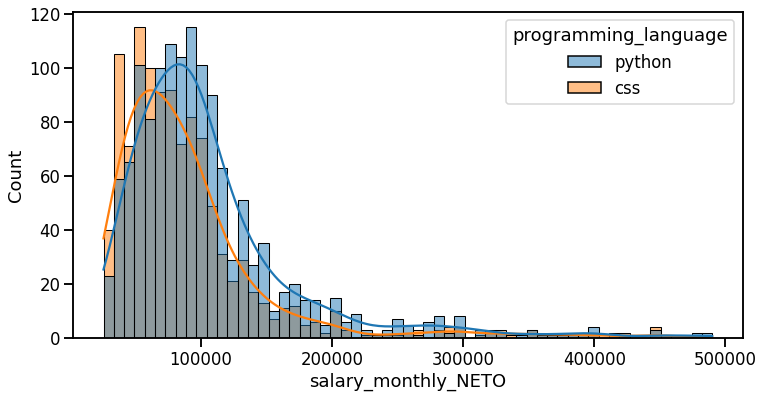

In [ ]:
#Comparamos uno de los lenguajes de media más alta (java o python) con uno de la media más baja (html o css)
interesting_languages = ["python", "css"] #,"html","sql","python", "java", "css"] 
filtered_df_lang_3 = df_lang[df_lang.programming_language.isin(interesting_languages)]
#distribuciones:
plt.figure(figsize=(12, 6))
seaborn.histplot(data=filtered_df_lang_3.reset_index(), x='salary_monthly_NETO', hue='programming_language', kde=True)
plt.ticklabel_format(style='plain', axis='x')

Vemos que difieren levemente entre sí. Por lo que podríamos decir que les usuaries que trabajan con lenguajes python o java tienen, en media, un sueldo mayor a les que trabajan con html o css.

Acá cabe recordar que de todes les encuenstades nos quedamos con una subpoblación cuyo sueldo pertenecía a un rango que elegimos nosotres. También debemos recordar que dividimos las filas que contenían más de un lenguaje en tantas filas como lenguajes. Lo que nos borra la posibilidad de estudiar el sueldo por cantidad de lenguajes y no sólo su tipo.


# 4°) Análisis de probabilidad



###Probabilidad condicional de ganar más que la media para cada lenguaje 

In [ ]:
df_lang.columns
df_lang.programming_language.value_counts()

javascript    2249
sql           1957
html          1658
python        1340
java          1331
              ... 
adabas           1
natural          1
rexx             1
regex            1
infobasic        1
Name: programming_language, Length: 191, dtype: int64

Probabilidad de tener salario mayor al promedio: ninguno --> 0.331
Probabilidad de tener salario mayor al promedio: html --> 0.32
Probabilidad de tener salario mayor al promedio: javascript --> 0.372
Probabilidad de tener salario mayor al promedio: python --> 0.459
Probabilidad de tener salario mayor al promedio: bash/shell --> 0.46
Probabilidad de tener salario mayor al promedio: c --> 0.435
Probabilidad de tener salario mayor al promedio: css --> 0.325
Probabilidad de tener salario mayor al promedio: java --> 0.446
Probabilidad de tener salario mayor al promedio: php --> 0.348
Probabilidad de tener salario mayor al promedio: sql --> 0.351
Probabilidad de tener salario mayor al promedio: typescript --> 0.43
Probabilidad de tener salario mayor al promedio: c# --> 0.329
Probabilidad de tener salario mayor al promedio: .net --> 0.341
Probabilidad de tener salario mayor al promedio: vba --> 0.265
Probabilidad de tener salario mayor al promedio: c++ --> 0.387
Probabilidad de tener salario 

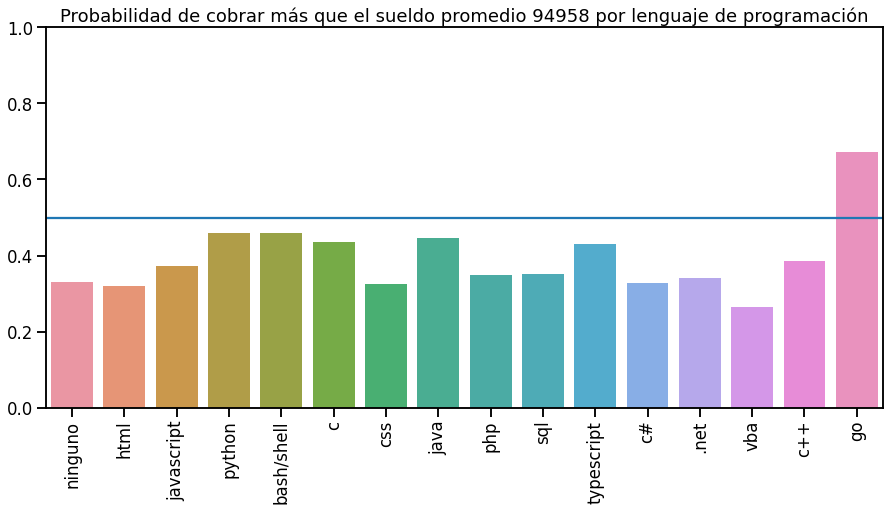

In [ ]:
d = filtered_df_lang
# Groupby index para realizar el promedio real y no duplicar salarios
avg = (d.groupby(d.index)["salary_monthly_NETO"].mean()).mean()

categ_list = []
probabilities = []

for language in d.programming_language.unique():
     s = d[d.programming_language == language].salary_monthly_NETO
     above_avg_mask = (s >= avg)
     len_study = s.shape[0]

     prob = np.round(above_avg_mask.sum()/len_study,3)
    
     categ_list.append(language)
     probabilities.append(prob)
    

     print(f"Probabilidad de tener salario mayor al promedio: {language} --> {prob}")
print("")
categ_prob = dict(zip(categ_list, probabilities))

plt.figure(figsize = [15,7])
seaborn.barplot(x = categ_list, y = probabilities)
plt.title(f"Probabilidad de cobrar más que el sueldo promedio {int(avg)} por lenguaje de programación")
plt.xticks(rotation = 90)
plt.axhline(0.5)
plt.ylim([0,1])
plt.show()

Aquí vemos que el 67% de les usuaries de *go* cobra por encima del promedio de los sueldos neto.

###Probabilidad condicional de ganar más de 100k dado que se programa en python o java


In [ ]:
#A: ganar mas de 100k
#B: programar en python
#C: programar en python y java

#marginal:
#número de personas que usan python P(B)*(numero total de encuestades)
#python_si = df_lang['programming_language']=='python'
#print(sum(python_si))
#número de personas que usan python o java P(C)*(numero total de encuestades)
pythonyjava_si = df_lang['programming_language'].isin(['python','java'])
print(sum(pythonyjava_si))

2671


In [ ]:
#conjunta:
#numero de personas que usan python Y ganan mas de 100k P(A,B)*(numero total de encuestades): 
#python_mas100 = (df_lang['programming_language']=='python') & (df_lang['salary_monthly_NETO'] > 100000)
#numero de personas que usan python o java Y ganan mas de 100k P(A,C)*(numero total de encuestades):
pythonyjava_mas100 = (df_lang['programming_language'].isin(['python','java'])) & (df_lang['salary_monthly_NETO'] > 100000)
#print(sum(python_mas100))
print(sum(pythonyjava_mas100))


1000


In [ ]:
#condicional:
#P(A|B) = P(A,B)/P(B)
#print(sum(python_mas100)/sum(python_si))
#P(A|C) = P(A,C)/P(C)
print(sum(pythonyjava_mas100)/sum(pythonyjava_si))

0.3743916136278547


In [ ]:
#es independiente ganar mas de 100k, P(A), con P(A|B)?
#es independiente ganar mas de 100k, P(A), con P(A|C)?
#P(A)
sum(df_lang['salary_monthly_NETO']>100000)/len(df_lang)


0.3228993023399395

Como vemos, la probabilidad de ganar mas de 100k dado que programa en python o java es del 37%. Además vemos que esta probabilidad es diferente a la probabilidad de ganar más de 100k, que es 32%, por lo que podemos concluir que ganar más de 100k y programar en python o java NO son eventos independientes.

# Ejercicio 2 - Densidades y varias varialbes

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones. 

## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos? 

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa




Las variables numéricas elegidas son:
*   Años de trabajo en la compañía
*   Salario Neto
*   Edad

Las variables categóricas elegidas son:
*   Género
*   Provincia

In [ ]:
sub_df = df[['profile_gender', 'work_province', 'work_years_in_company', 'salary_monthly_NETO', 'profile_age']]

In [ ]:
sub_df[:3]

,profile_gender,work_province,work_years_in_company,salary_monthly_NETO,profile_age
0,Mujer,Ciudad Autónoma de Buenos Aires,3.0,43000.0,26
1,Hombre,Corrientes,2.0,63000.0,29
2,Mujer,Ciudad Autónoma de Buenos Aires,0.0,127000.0,22


In [ ]:
sub_df['salary_monthly_NETO'].describe().apply(lambda s: '{0:.2f}'.format(s))

count       5883.00
mean       94907.95
std        96862.26
min            1.00
25%        51480.00
50%        78000.00
75%       106000.00
max      2080000.00
Name: salary_monthly_NETO, dtype: object

En el siguiente gráfico podemos observar la distribución de les encuestades respecto a su edad.

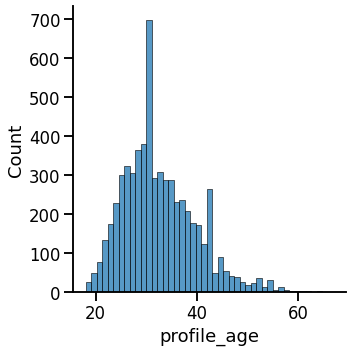

In [ ]:
seaborn.displot(sub_df[sub_df.profile_age < 100].profile_age)

Aquí concluimos que la mayoría aproximadamente tiene alrededor de 30 años.

Otra visualización que podemos realizar, es aquella que no solo muestra las frecuencias por edad, sino también realiza una discriminación por género.

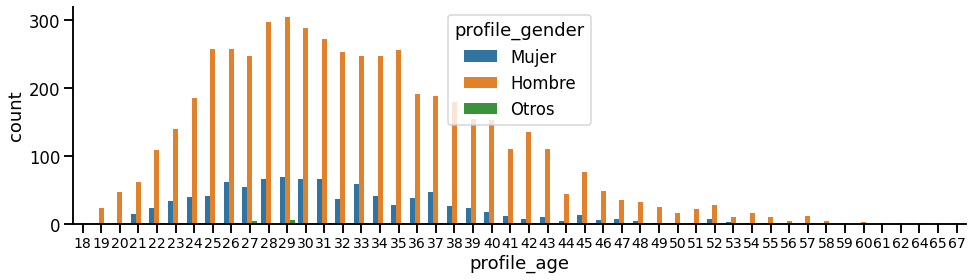

In [ ]:
fig = plt.figure(figsize=(16,4))
#age_counts = sub_df.groupby([profile_gender,profile_age]).profile_age.count().reset_index()
#sub_df[sub_df.profile_age < 100].profile_age.value_counts()
seaborn.countplot(data=sub_df[sub_df["profile_age"] <= 70], x='profile_age', hue='profile_gender')
plt.xticks(fontsize=14)
seaborn.despine()

Aquí vemos como claramente en todas las edades, el número de hombres encuestados supera ampliamente a los demás géneros.

## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría



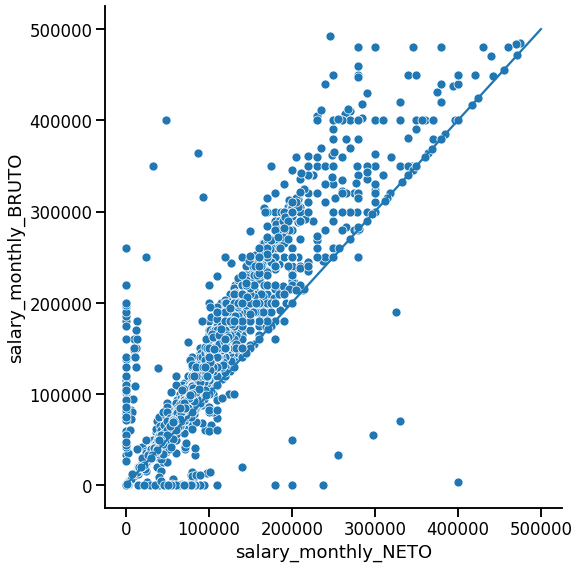

In [ ]:
min_sn = 25000
max_sn = 500000
#seaborn.pairplot(data=df[(min_sn < df.salary_monthly_NETO) & (df.salary_monthly_NETO < max_sn)], y_vars=['salary_monthly_BRUTO'],

seaborn.pairplot(data=df[(df.salary_monthly_BRUTO < max_sn) & (df.salary_monthly_NETO < max_sn)], y_vars=['salary_monthly_BRUTO'],
                 x_vars=['salary_monthly_NETO'],
                 aspect=1, height=8)
#seaborn.regplot(data=df[(df.salary_monthly_BRUTO < max_sn) & (df.salary_monthly_NETO < max_sn)], y='salary_monthly_BRUTO',
 #                x='salary_monthly_NETO')
seaborn.lineplot(y = np.arange(0,max_sn, (max_sn-0) / len(df[(df.salary_monthly_BRUTO < max_sn) & (df.salary_monthly_NETO < max_sn)])), 
                                  x =  np.arange(0,max_sn, (max_sn-0) / len(df[(df.salary_monthly_BRUTO < max_sn) & (df.salary_monthly_NETO < max_sn)]))) 

Las lineas verticales indican personas que contestaron su salario bruto y casi nada o nada del neto. La linea horizontal indica el caso contrario; personas que indicaron su salario neto pero nada del bruto.
Se ven muchas personas que indicaron un salario bruto igual al neto (linea a 45 grados), o personas que comentaron que su sueldo bruto es menor que su sueldo neto (datos por debajo de la línea de 45°).

Estos casos indicarían personas que llenaron mal el formulario. Sin embargo, hay una porción importante de datos rellenados de forma correcta.

En este sentido consideramos mejor no tirar ninguna de las dos columnas.


In [ ]:
#Calculo de correlacion
df.corr()

,profile_age,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,salary_on_call_duty_charge,salary_monthly_BRUTO,salary_monthly_NETO,salary_satisfaction,salary_comparison_last_semester,salary_percentage_inflation_adjustment_2020,salary_month_last_inflation_adjustment,company_recommended,company_diversity_policies
profile_age,1.000000,0.009316,0.022181,0.027657,0.001154,-0.000541,-0.006752,-0.003909,0.005452,0.007943,0.013962,0.018650,0.002991,0.001167
profile_years_experience,0.009316,1.000000,0.512288,0.485628,0.096228,0.045961,0.250545,0.234471,-0.002998,-0.050249,-0.026175,-0.025907,-0.064246,-0.027675
work_years_in_company,0.022181,0.512288,1.000000,0.579205,0.116935,0.054418,0.019175,0.018223,-0.120715,-0.179082,-0.030476,-0.018353,-0.178880,-0.137251
work_years_in_current_position,0.027657,0.485628,0.579205,1.000000,0.029379,0.016424,0.039366,0.045107,-0.085018,-0.124151,-0.023831,-0.026088,-0.142257,-0.099066
work_people_in_charge_of,0.001154,0.096228,0.116935,0.029379,1.000000,0.003338,0.101176,0.077913,0.026433,0.024346,0.015548,0.023246,-0.000400,-0.009451
salary_on_call_duty_charge,-0.000541,0.045961,0.054418,0.016424,0.003338,1.000000,0.149794,0.169135,-0.000021,0.002596,0.007800,0.011848,-0.000033,-0.020966
salary_monthly_BRUTO,-0.006752,0.250545,0.019175,0.039366,0.101176,0.149794,1.000000,0.833335,0.344676,0.331435,0.010695,-0.009646,0.196381,0.115718
salary_monthly_NETO,-0.003909,0.234471,0.018223,0.045107,0.077913,0.169135,0.833335,1.000000,0.339314,0.324840,-0.018899,-0.043154,0.192391,0.095460
salary_satisfaction,0.005452,-0.002998,-0.120715,-0.085018,0.026433,-0.000021,0.344676,0.339314,1.000000,0.726729,0.135787,0.132682,0.511647,0.226400
salary_comparison_last_semester,0.007943,-0.050249,-0.179082,-0.124151,0.024346,0.002596,0.331435,0.324840,0.726729,1.000000,0.210132,0.180426,0.464407,0.206204


El coeficiente de correlación entre el Salario Neto y Bruto es 0,83

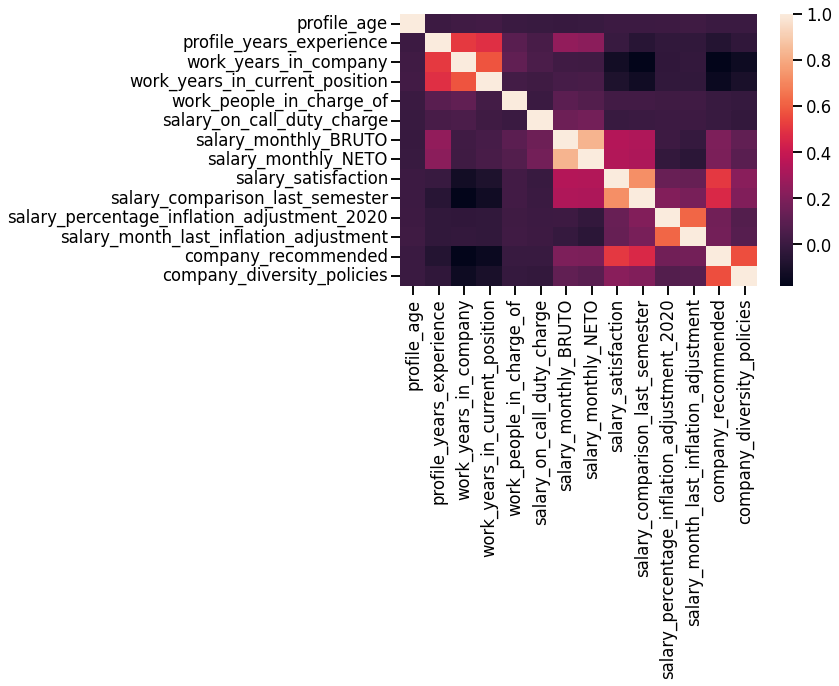

In [ ]:
fig = plt.figure(figsize=(8,5))
seaborn.heatmap(data=df.corr())


Ambas variables poseen una alta correlación, y por lo mencionado anteriormente consideramos que es mejor conservar ambas columnas.

## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






In [ ]:
sub_df2 = df[['profile_studies_level', 'salary_monthly_NETO']]

Para poder seleccionar las subpoblaciones a estudiar, realizamos un conteo del número de programadores según el nivel de estudios alcanzado. Podemos observar que los niveles que predominan son universitario y terciario.

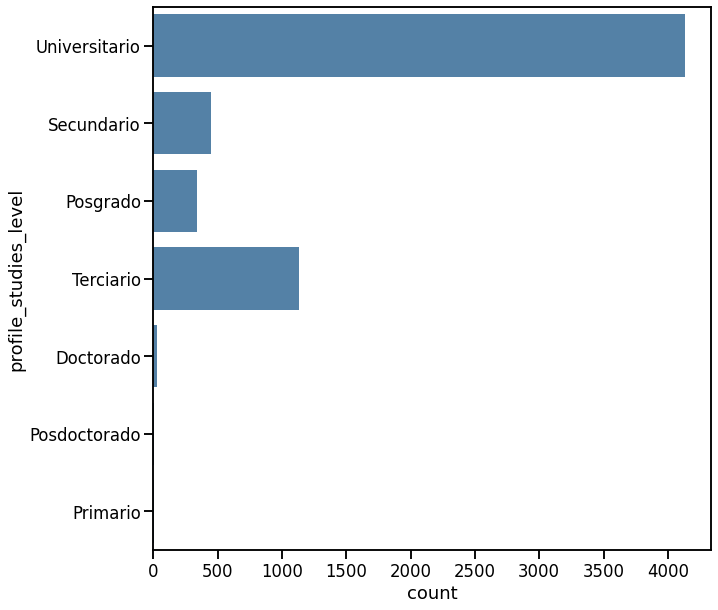

In [ ]:
fig = plt.figure(figsize=(10, 10))
seaborn.countplot(y=sub_df2.profile_studies_level, color='steelblue')

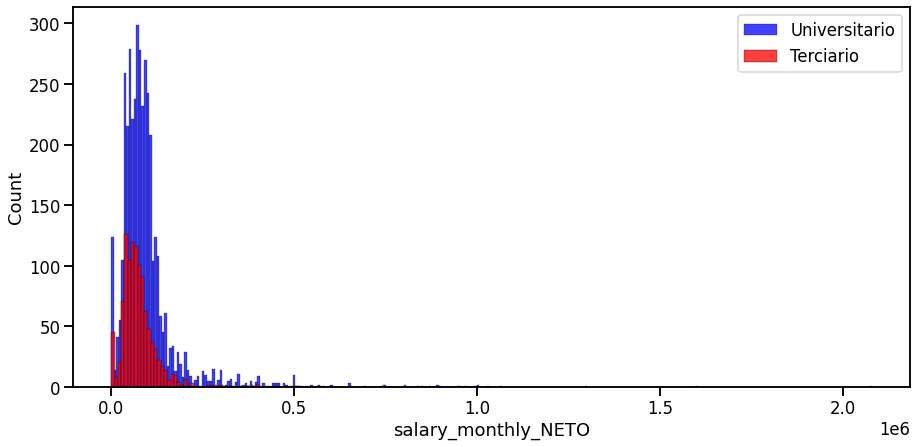

In [ ]:
# Utilizamos el mismo gráfico del item a), pero comparando las distribuciones de salario de los niveles terciario y universitario.
plt.figure(figsize=[15,7])
seaborn.histplot(sub_df2[sub_df2["profile_studies_level"] == "Universitario"]["salary_monthly_NETO"], label = "Universitario", color = "b")
seaborn.histplot(sub_df2[sub_df2["profile_studies_level"] == "Terciario"]["salary_monthly_NETO"],  label = "Terciario", color = "r")
plt.legend()
plt.show()

Para poder determinar si el salario neto y el nivel de estudio son variables independientes, vamos a tomar en consideración las siguientes probabilidades:
* P(A) = Probabilidad que les encuestades tengan un ingreso neto que esté comprendido entre el primer y el tercer cuartil.
* P(B) = Probabilidad de que les encuestades tengan como máximo nivel de estudios alcanzado 'universitario' o 'terciario', teniendo en cuenta que estos niveles son predominante en la encuesta.

In [ ]:
Q1,Q3 = np.nanquantile(sub_df['salary_monthly_NETO'].values, [0.25, 0.75])

In [ ]:
#P(A)
#Probabilidad de que los sueldos netos se encuentren entre el primer y el tercer cuartil, tomando como referencia la población total de estudio.
prob_Q1_Q3 = len(sub_df2[(Q1 <= sub_df2['salary_monthly_NETO']) & (sub_df2['salary_monthly_NETO']>=Q3)]) / len(sub_df2)
prob_Q1_Q3

0.24232977850697293

In [ ]:
#subpoblación A
is_above_Q1 = (sub_df2['salary_monthly_NETO'] >= Q1) & (sub_df2['salary_monthly_NETO'] <= Q3)
#Subpoblación B
level_studies = sub_df2['profile_studies_level'].isin(['Terciario', 'Universitario'])

In [ ]:
#P(A,B)*Número total de encuestades 
intersection_count = len(sub_df2[is_above_Q1 & level_studies])
sub_df2[is_above_Q1 & level_studies]


,profile_studies_level,salary_monthly_NETO
1,Universitario,63000.0
4,Universitario,106000.0
6,Universitario,62400.0
8,Universitario,75000.0
11,Universitario,94621.0
...,...,...
6085,Terciario,53784.0
6086,Universitario,82000.0
6090,Terciario,97000.0
6091,Universitario,71000.0


In [ ]:
#P(A|B) = P(A,B)/P(B)
p_cond = len(df[is_above_Q1 & level_studies]) / len(df[level_studies])
p_cond

0.4935459377372817

Podemos concluir que en la subpoblación elegida, la probabilidad condicional de que les programadores cobren entre el primer y el tercer cuartil, dado que su máximo nivel de estudio es 'terciario' o 'universitario' es de aproximadamente 0,50. Por otro lado, la probabilidad de que une programadore tenga un sueldo neto entre el primer y tercer cuartil es de aproximadamente 0,24.
Por lo tanto ambos eventos no son independientes.

## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica. 
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)


Las variables numéricas elegidas son 'Años en la compañía' y 'Años de experiencia'. La variable categórica es 'Género'.

In [ ]:
sub_df3 = df[['profile_gender', 'work_years_in_company', 'profile_years_experience']]

(0.0, 60.0)

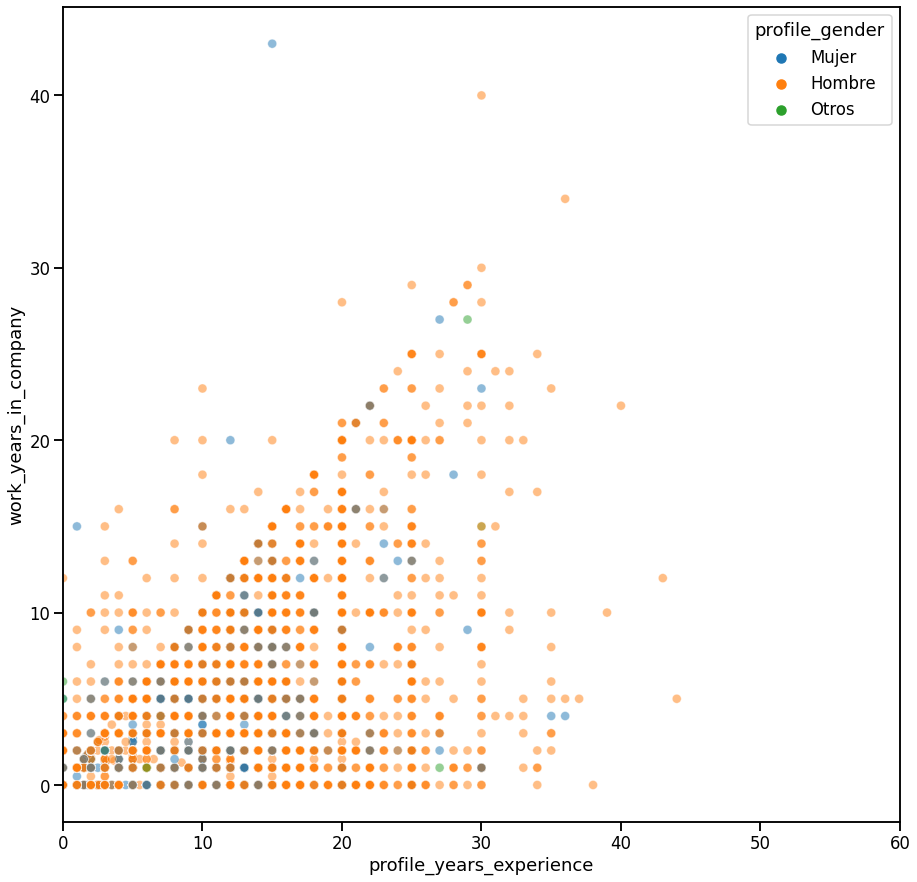

In [ ]:
plt.figure(figsize = [15,15])
seaborn.scatterplot(data=sub_df3, x="profile_years_experience", y="work_years_in_company", hue="profile_gender", alpha = 0.5) #size = 1
plt.xlim([0,60])

Podemos concluir tres ideas observando el gráfico:


*   En primer lugar, se puede ver una cierta y esperable correlación entre los años de experiencia y los años de trabajo en la empresa actual.
*   En segundo lugar, podemos observar que los datos que se encuentran por encima de la línea de 45°, corresponden a datos mal cargados.
*   En tercer lugar, no podemos observar una segmentación clara respecto al género.





